# Assignment 3: Classification Methods

## Overview

The purpose of this assignment is to familiarize you with concepts employed by classification methods. This assignment focuses on two popular classification methods: *k*-nearest neighbor and decision tree. Note that the scikit-learn implementation of *k*-nearest neighbor is called KNeighborsClassifier and its implementation of decision tree is called DecisionTreeClassifier.

#### Dataset
You will use the hypothyroid disease dataset for this assignment.

#### Submission
You are expected to submit a single Jupyter/IPython Notebook file for the assignment. Your code can be embedded into the notebook file as code cells, while your answers to the questions can be embedded as markdown cells. Please submit your notebook file via NotreDameX.

*NOTE: This notebook is provided only as a template for you to use for the assignment. You may customize it as you see fit.*

In [16]:
import pandas as pd

# Read in the file URL.
fileURL = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv'


# Read the file into a DataFrame.
data = pd.read_csv(fileURL)

# Output the first few rows of the dataset.
data.head()

Age Sex On Thyroxine Query on Thyroxine On Antithyroid Medication  \
0   72   M            f                  f                         f   
1   15   F            t                  f                         f   
2   24   M            f                  f                         f   
3   24   F            f                  f                         f   
4   77   M            f                  f                         f   

  Thyroid Surgery Query Hypothyroid Query Hyperthyroid Pregnant Sick  \
0               f                 f                  f        f    f   
1               f                 f                  f        f    f   
2               f                 f                  f        f    f   
3               f                 f                  f        f    f   
4               f                 f                  f        f    f   

      ...        T3 TT4 Measured TT4 T4U Measured   T4U FTI Measured  FTI  \
0     ...       0.6            y  15            y  1.48            y   10   
1     ...       1.7            y  19            y  1.13            y   17   
2     ...       0.2            y   4            y  1.00            y    0   
3     ...       0.4            y   6            y  1.04            y    6   
4     ...       1.2            y  57            y  1.28            y   44   

  TBG Measured  TBG        Class  
0            n  NaN  hypothyroid  
1            n  NaN  hypothyroid  
2            n  NaN  hypothyroid  
3            n  NaN  hypothyroid  
4            n  NaN  hypothyroid  

[5 rows x 26 columns]

## Questions

#### 1. 3-Nearest Neighbor
Use *k*-nearest neighbor to classify the hypothyroid data. Set the number of neighbors, *k*, to 3. Split the data so that 80% is used for training and the remaining 20% for testing. The scikit-learn implementation of *k*-Nearest Neighbor is called KNeighborsClassifier (sklearn.neighbors.KNeighborsClassifier). You may also use the scikit-learn for splitting data into training and testing sets (sklearn.cross_validation.train_test_split). Visualize the results on the testing set by plotting the decision boundaries with two features of your choice. Any observations about the decision boundary? *(3 points)*

TSH    0
dtype: float64
TSH    530
dtype: float64
Decision boundary resulting from training data - before plotting testing data


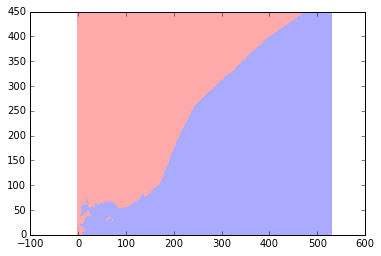

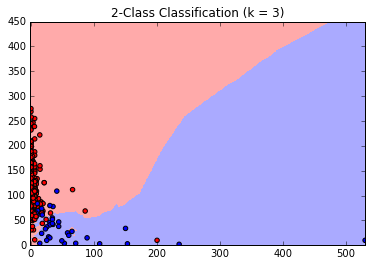

In [17]:
%matplotlib inline
import sklearn
import numpy as np
import pylab as pl

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import Imputer

#help(sklearn)
#help(sklearn.cross_validation)
#help(train_test_split)

k = 3
training_percent = 0.80
testing_percent = 0.20

#Impute with the mean

imputer = Imputer(missing_values=np.nan, strategy="mean", axis=0, copy=True)
X = imputer.fit_transform(data[['TSH', 'TT4']].values)
Y = data[['Class']].replace(to_replace=['hypothyroid','negative'],value=[1,0]).transpose().values[0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testing_percent, random_state=42)

print data[['TSH']].min()
print data[['TSH']].max()

h = 1

# colormaps 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])

# fit the classifier to training data
clf = KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# plot results

Z = Z.reshape(xx.shape)

pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

print "Decision boundary resulting from training data - before plotting testing data"
pl.show()


pl.pcolormesh(xx, yy, Z, cmap=cmap_light)
pl.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.title("2-Class Classification (k = %d)" % k)

pl.show()


The classifier is pretty accurate, except in the bottom left you have a lot of blue points in the red area. 

#### 2. 5-Nearest Neighbor
Use *k*-nearest neighbor to classify the hypothyroid data again, but now set the number of neighbors to 5. Again split the data so that 80% is used for training and the remaining 20% for testing. Again, visualize the results on the testing set by plotting the decision boundaries with two features of your choice. Any observations about the decision boundary? How does it differ from the decision boundary when *k* = 3? *(3 points)*

Decision boundary resulting from training data - before plotting testing data


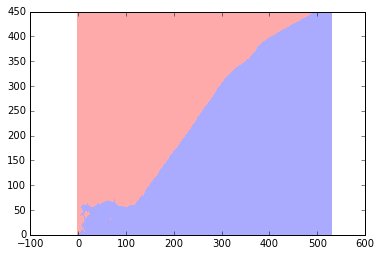

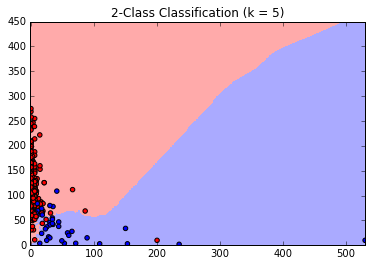

In [18]:
k = 5

# fit the classifier to training data
clf = KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# plot results

Z = Z.reshape(xx.shape)

pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

print "Decision boundary resulting from training data - before plotting testing data"
pl.show()


pl.pcolormesh(xx, yy, Z, cmap=cmap_light)
pl.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.title("2-Class Classification (k = %d)" % k)

pl.show()

With k=5, the boundary is a little bit cleaner.  You can see in the first diagram without the plots pointed, that the red area does not overlap the blue area as much.  But, the overall accuracy looks prette much the same.  You have a couple of red points in the blue area, and a lot of blue points in the read area, just like with k = 3.

#### 3. Decision Tree
Use a decision tree to classify the hypothyroid data. Again, split the data so that 80% is used for training and the remaining 20% for testing. The scikit-learn implementation of decision tree is called DecisionTreeClassifier (sklearn.tree.DecisionTreeClassifier). You may also use the scikit-learn for partitioning data into training and testing sets (sklearn.cross_validation.train_test_split). Visualize the results on the testing set by plotting the decision boundaries with two features of your choice. Any observations about the decision boundary? How does it differ from the decision boundaries produced by *k*-Nearest Neighbor. *(4 points)*

Decision boundary resulting from training data - before plotting testing data


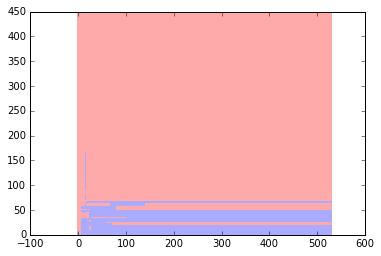

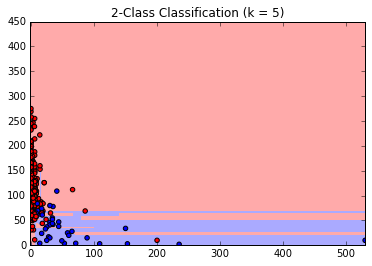

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)

pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

print "Decision boundary resulting from training data - before plotting testing data"
pl.show()


pl.pcolormesh(xx, yy, Z, cmap=cmap_light)
pl.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cmap_bold)
pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.title("2-Class Classification (k = %d)" % k)

pl.show()

This boundary is horizontal, and so does not show a trend as the x value increases. It looks like it should be less accurate because the boundary is not clean looking, but it actually has a similar number of points that are correct as in the other two classifiers. 
As you can see in the first plot, the one that only shows the decision boundary, this classifier has a little streak of blue going upwards that matches some of the blue points that in previous classifications were in a completely red area. 